In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape  #Training Data set: 50k data samples, 32x32 images, 3 for RGB channels

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 97s 1us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape #Testing Data Set: 10k images

(10000, 32, 32, 3)

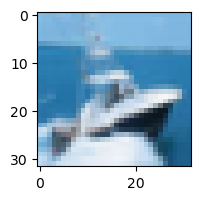

In [8]:
plt.figure(figsize = (15, 2))  #Checking a random image from training set
plt.imshow(X_train[8])

In [12]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#y_train contains labels of images
y_train = y_train.reshape(-1,) #reshaping y 2D array to output classes(labels) with plot_sample
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
def plot_sample(X, y, index): #Function to plot image sample
    plt.figure(figsize = (15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

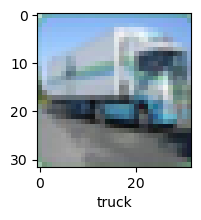

In [34]:
plot_sample(X_train, y_train, 109)

In [20]:
#Setting pixel values between 0-1 by dividing by 255
#Normalising Data
X_train = X_train/255
X_test = X_test/255 

In [21]:
#Building ANN:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), #input layer is flattened 32x32x3
        layers.Dense(3000, activation='relu'), #deep layer with 3000 neurons
        layers.Dense(1000, activation='relu'), #deep layer with 1000 neurons
        layers.Dense(10, activation='softmax') #last layer with 10 (10 categories)
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', #y is a value so sparse used
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.3008 - loss: 1.9348
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4219 - loss: 1.6494
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4514 - loss: 1.5507
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4748 - loss: 1.4918
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4976 - loss: 1.4332


In [23]:
#Accuracy low with ANN
#Building CNN
cnn = models.Sequential([

        #CNN:
        layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)), #applying Convolution + Relu
        #automaticaly figures out the kernels/fiters - just give number and dimensions
    
        layers.MaxPooling2D((2,2)),  #applying Max Pooling

        #Applying a Second Layer just to experiment:
        layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),             

        #dense 
        layers.Flatten(),                      #automatically figures out shape
        layers.Dense(64, activation='relu'),   #not alot of deep layers required, cnn does most
        layers.Dense(10, activation='softmax') #last layer with 10 (10 categories)
    ])


C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #y is a value so sparse used
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.3780 - loss: 1.7085
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5747 - loss: 1.2045
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6274 - loss: 1.0663
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6551 - loss: 0.9880
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6813 - loss: 0.9198
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6917 - loss: 0.8798
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7085 - loss: 0.8382
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7234 - loss: 0.7947
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7341 - loss: 0.7590
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7458 - loss: 0.7266


In [25]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4682 - loss: 1.4798


[1.4836316108703613, 0.4706000089645386]

In [26]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6762 - loss: 0.9472


[0.9434102773666382, 0.6801000237464905]

In [27]:
#if trained for more epochs, accuracy can increase

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report (ANN): \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report (ANN): 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53      1000
           1       0.60      0.64      0.61      1000
           2       0.26      0.64      0.36      1000
           3       0.38      0.29      0.33      1000
           4       0.56      0.18      0.27      1000
           5       0.51      0.24      0.33      1000
           6       0.50      0.56      0.53      1000
           7       0.56      0.56      0.56      1000
           8       0.73      0.50      0.59      1000
           9       0.48      0.63      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



In [43]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
print("Classification Report (CNN): \n", classification_report(y_test, y_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report (CNN): 
               precision    recall  f1-score   support

           0       0.67      0.76      0.72      1000
           1       0.79      0.81      0.80      1000
           2       0.51      0.62      0.56      1000
           3       0.52      0.41      0.46      1000
           4       0.68      0.60      0.64      1000
           5       0.54      0.66      0.60      1000
           6       0.78      0.76      0.77      1000
           7       0.74      0.72      0.73      1000
           8       0.84      0.73      0.78      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

